In [1]:
import numpy as np
import torch
import scanpy as sc
from data import PertDataloader, Network


model_name = 'GNN_Disentangle_sim_gnn'
args = np.load('./saved_args/'+model_name+'.npy', allow_pickle = True).item()
args['device'] = 'cuda:4'

In [2]:
args['test_perts'] = 'N/A'

In [3]:
if args['network_name'] == 'string':
    args['network_path'] = '/dfs/project/perturb-gnn/graphs/STRING_full_9606.csv'

if args['dataset'] == 'Norman2019':
    data_path = '/dfs/project/perturb-gnn/datasets/Norman2019_hvg+perts_more_de.h5ad'

adata = sc.read_h5ad(data_path)
if 'gene_symbols' not in adata.var.columns.values:
    adata.var['gene_symbols'] = adata.var['gene_name']
gene_list = [f for f in adata.var.gene_symbols.values]
# Set up message passing network
network = Network(fname=args['network_path'], gene_list=args['gene_list'],
                  percentile=args['top_edge_percent'])

# Pertrubation dataloader
pertdl = PertDataloader(adata, network.G, network.weights, args)

There are 101013 edges in the PPI.
Creating pyg object for each cell in the data...
Local copy of pyg dataset is detected. Loading...
Loading splits...
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:52
combo_seen2:18
unseen_single:37
Creating dataloaders....
Dataloaders created...


In [4]:
model = torch.load('./saved_models/' + model_name)
#model.pert_emb_agg = 'constant'
#model.lambda_emission = False
model.sim_gnn = False
model.args = args
from inference import evaluate, compute_metrics, deeper_analysis, GI_subgroup

test_res = evaluate(pertdl.loaders['test_loader'],
                        pertdl.loaders['edge_index'],
                        pertdl.loaders['edge_attr'], model, args)

test_metrics, test_pert_res = compute_metrics(test_res)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/

In [5]:
out = deeper_analysis(adata, test_res)

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

In [6]:
# calculate mean expression for each condition
unique_conditions = adata.obs.condition.unique()
conditions2index = {}
for i in unique_conditions:
    conditions2index[i] = np.where(adata.obs.condition == i)[0]
    
condition2mean_expression = {}
for i, j in conditions2index.items():
    condition2mean_expression[i] = np.mean(adata.X[j], axis = 0)
    
pert_list = np.array(list(condition2mean_expression.keys()))
mean_expression = np.array(list(condition2mean_expression.values())).reshape(len(adata.obs.condition.unique()), adata.X.toarray().shape[1])

ctrl = mean_expression[np.where(pert_list == 'ctrl')[0]]
most_variable_genes = np.argsort(np.std(mean_expression, axis = 0))[-200:]
gene_list = adata.var['gene_name'].values

In [7]:
fold_change_all = []
for c in pert_list:
    i = np.where(pert_list == c)[0]
    pert = mean_expression[i]

    fold_change = pert/ctrl
    fold_change[np.isnan(fold_change)] = 0
    fold_change[np.isinf(fold_change)] = 0

    #fold_change[0][np.where(pert[0] < 0.5)[0]] = 0
    fold_change_all.append(fold_change[0])
    
fold_change_all = np.stack(fold_change_all)


/tmp/ipykernel_78786/1466758563.py:6: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert/ctrl
/tmp/ipykernel_78786/1466758563.py:6: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert/ctrl


In [8]:
combo_seen0 = pertdl.subgroup['test_subgroup']['combo_seen0']
combo_seen1= pertdl.subgroup['test_subgroup']['combo_seen1']
unseen_single = pertdl.subgroup['test_subgroup']['unseen_single']
train_perts = pertdl.set2conditions['train']

In [9]:
combo_seen0

['POU3F2+FOXL2',
 'ZBTB10+PTPN12',
 'CEBPB+PTPN12',
 'CBL+PTPN12',
 'RHOXF2BB+SET',
 'CDKN1C+CDKN1B',
 'CDKN1C+CDKN1A',
 'CDKN1B+CDKN1A',
 'C3orf72+FOXL2']

In [10]:
train_pert = train_perts[0]
pert2high_folds_up = {}
pert2low_folds_down = {}

for train_pert in train_perts:
    temp = np.where(pert_list == train_pert)[0]
    o = np.intersect1d(np.where(fold_change_all[temp][0] <0.333)[0], np.where(fold_change_all[temp][0] > 0)[0])
    if len(o) > 0:
        pert2low_folds_down[train_pert] = gene_list[o].tolist()
        
    o = np.where(fold_change_all[np.where(pert_list == train_pert)[0]][0] >3)[0]
    if len(o) > 0:
        pert2high_folds_up[train_pert] = gene_list[o].tolist()

In [11]:
all_high_folds = []
for i in pert2high_folds_up.values():
    all_high_folds = all_high_folds + i
    
all_high_folds_down = []
for i in pert2low_folds_down.values():
    all_high_folds_down = all_high_folds_down + i

In [12]:
all_high_folds_stats = {}

for i in pert2high_folds_up.values():
    for j in i:
        if j in all_high_folds_stats:
            all_high_folds_stats[j] += 1
        else:
            all_high_folds_stats[j] = 1


all_high_folds_down_stats = {}

for i in pert2low_folds_down.values():
    for j in i:
        if j in all_high_folds_down_stats:
            all_high_folds_down_stats[j] += 1
        else:
            all_high_folds_down_stats[j] = 1

In [13]:
all_high_folds = np.unique(all_high_folds)
all_high_folds_down = np.unique(all_high_folds_down)

In [14]:
len(all_high_folds_down)

912

In [15]:
from utils import parse_single_pert, parse_any_pert
unseen_single_gene = [parse_single_pert(i) for i in unseen_single]
genesymbol2pert = dict(zip(unseen_single_gene, unseen_single))

In [16]:
print('# of upreg perts: ' + str(len(np.unique(np.intersect1d(unseen_single_gene, all_high_folds)))))
print('# of downreg perts: ' + str(len(np.unique(np.intersect1d(unseen_single_gene, all_high_folds_down)))))
print('# of total num of perts: ' + str(len(np.unique(unseen_single_gene))))

# of upreg perts: 5
# of downreg perts: 7
# of total num of perts: 27


In [17]:
up_overlap = np.intersect1d(unseen_single_gene, all_high_folds)
down_overlap = np.intersect1d(unseen_single_gene, all_high_folds_down)
non_overlap = np.setdiff1d(unseen_single_gene, up_overlap.tolist() + down_overlap.tolist())

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

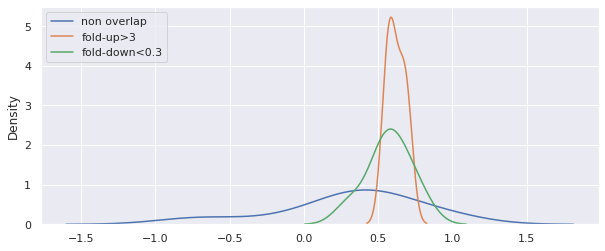

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 4)})

metric = 'pearson_delta_top20_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top20_de')

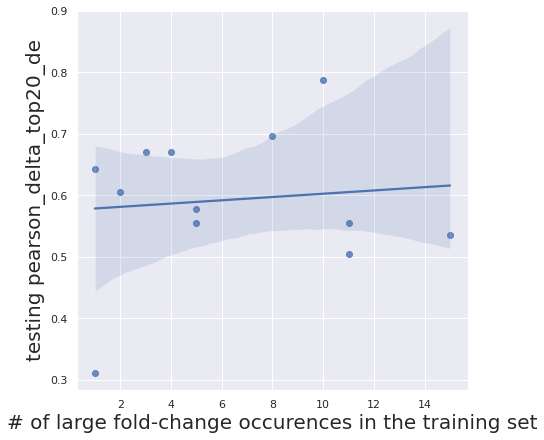

In [19]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

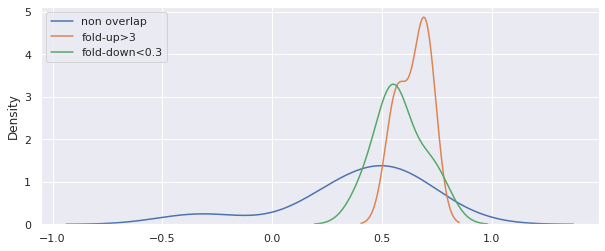

In [24]:
sns.set(rc={'figure.figsize':(10, 4)})

metric = 'pearson_delta_top50_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top50_de')

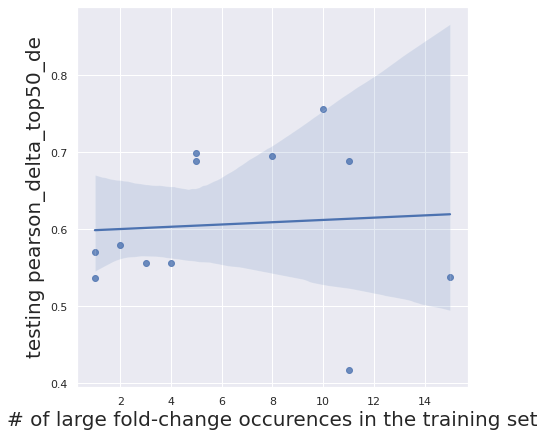

In [21]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

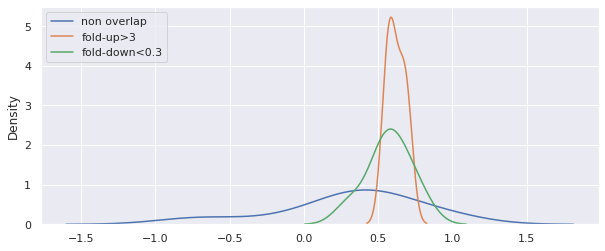

In [25]:
sns.set(rc={'figure.figsize':(10, 4)})
metric = 'pearson_delta_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_de')

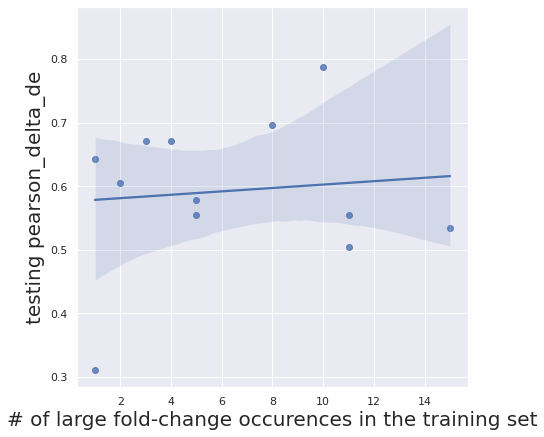

In [23]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

In [100]:
non_overlap

array(['ARID1A', 'BCL2L11', 'BCORL1', 'BPGM', 'CBL', 'CDKN1B', 'CEBPB',
       'CELF2', 'CKS1B', 'COL2A1', 'ISL2', 'MAP7D1', 'NCL', 'PLK4',
       'PTPN1', 'PTPN12', 'SET'], dtype='<U8')